<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.090741,38.524031,-10.081316,102.533456,111.113566,-8.580110
1,0.0,1.0,62.167993,49.950444,-9.455212,112.663225,121.106059,-8.442834
2,0.0,2.0,21.484035,22.502291,6.374375,60.360701,59.692085,0.668615
3,0.0,3.0,42.342182,72.704230,11.334463,136.380876,127.794357,8.586518
4,0.0,4.0,50.339547,45.614342,12.134526,118.088415,106.943810,11.144605
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.810439,26.312603,-8.927080,109.195963,116.786823,-7.590861
29996,999.0,26.0,59.590379,41.832450,9.865441,121.288270,114.575532,6.712739
29997,999.0,27.0,53.526654,90.926228,8.422311,162.875193,158.656913,4.218280
29998,999.0,28.0,93.721910,76.551129,-12.558112,167.714926,176.303740,-8.588814


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    64.090741  38.524031 -10.081316  102.533456  111.113566   
      1.0    62.167993  49.950444  -9.455212  112.663225  121.106059   
      2.0    21.484035  22.502291   6.374375   60.360701   59.692085   
      3.0    42.342182  72.704230  11.334463  136.380876  127.794357   
      4.0    50.339547  45.614342  12.134526  118.088415  106.943810   
...                ...        ...        ...         ...         ...   
999.0 25.0   81.810439  26.312603  -8.927080  109.195963  116.786823   
      26.0   59.590379  41.832450   9.865441  121.288270  114.575532   
      27.0   53.526654  90.926228   8.422311  162.875193  158.656913   
      28.0   93.721910  76.551129 -12.558112  167.714926  176.303740   
      29.0   49.246611  78.438987  14.639188  152.324786  142.814206   

                 e_hat  
rep   index             
0.0   0.0    -8.580110  
      1.0    -8.442834  
      2.0     0.668615  
      3.0     8.586518  
      4.0    11.144605  
...                ...  
999.0 25.0   -7.590861  
      26.0    6.712739  
      27.0    4.218280  
      28.0   -8.588814  
      29.0    9.510580  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    64.090741  38.524031 -10.081316  102.533456  111.113566   
      1.0    62.167993  49.950444  -9.455212  112.663225  121.106059   
      2.0    21.484035  22.502291   6.374375   60.360701   59.692085   
      3.0    42.342182  72.704230  11.334463  136.380876  127.794357   
      4.0    50.339547  45.614342  12.134526  118.088415  106.943810   
...                ...        ...        ...         ...         ...   
999.0 25.0   81.810439  26.312603  -8.927080  109.195963  116.786823   
      26.0   59.590379  41.832450   9.865441  121.288270  114.575532   
      27.0   53.526654  90.926228   8.422311  162.875193  158.656913   
      28.0   93.721910  76.551129 -12.558112  167.714926  176.303740   
      29.0   49.246611  78.438987  14.639188  152.324786  142.814206   

                 e_hat  
rep   index             
0.0   0.0    -8.580110  
      1.0    -8.442834  
      2.0     0.668615  
      3.0     8.586518  
      4.0    11.144605  
...                ...  
999.0 25.0   -7.590861  
      26.0    6.712739  
      27.0    4.218280  
      28.0   -8.588814  
      29.0    9.510580  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.090741,38.524031,-10.081316,102.533456,111.113566,-8.580110
1,0.0,1.0,62.167993,49.950444,-9.455212,112.663225,121.106059,-8.442834
2,0.0,2.0,21.484035,22.502291,6.374375,60.360701,59.692085,0.668615
3,0.0,3.0,42.342182,72.704230,11.334463,136.380876,127.794357,8.586518
4,0.0,4.0,50.339547,45.614342,12.134526,118.088415,106.943810,11.144605
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.810439,26.312603,-8.927080,109.195963,116.786823,-7.590861
29996,999.0,26.0,59.590379,41.832450,9.865441,121.288270,114.575532,6.712739
29997,999.0,27.0,53.526654,90.926228,8.422311,162.875193,158.656913,4.218280
29998,999.0,28.0,93.721910,76.551129,-12.558112,167.714926,176.303740,-8.588814


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    64.090741  38.524031 -10.081316  102.533456  111.113566   
      1.0    62.167993  49.950444  -9.455212  112.663225  121.106059   
      2.0    21.484035  22.502291   6.374375   60.360701   59.692085   
      3.0    42.342182  72.704230  11.334463  136.380876  127.794357   
      4.0    50.339547  45.614342  12.134526  118.088415  106.943810   
...                ...        ...        ...         ...         ...   
999.0 25.0   81.810439  26.312603  -8.927080  109.195963  116.786823   
      26.0   59.590379  41.832450   9.865441  121.288270  114.575532   
      27.0   53.526654  90.926228   8.422311  162.875193  158.656913   
      28.0   93.721910  76.551129 -12.558112  167.714926  176.303740   
      29.0   49.246611  78.438987  14.639188  152.324786  142.814206   

                 e_hat  
rep   index             
0.0   0.0    -8.580110  
      1.0    -8.442834  
      2.0     0.668615  
      3.0     8.586518  
      4.0    11.144605  
...                ...  
999.0 25.0   -7.590861  
      26.0    6.712739  
      27.0    4.218280  
      28.0   -8.588814  
      29.0    9.510580  

[30000 rows x 6 columns]

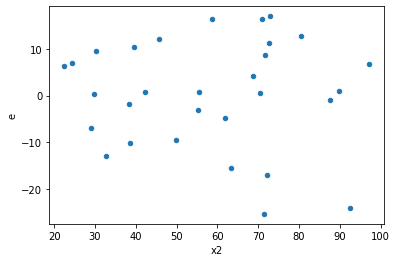

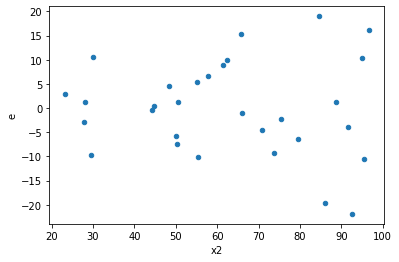

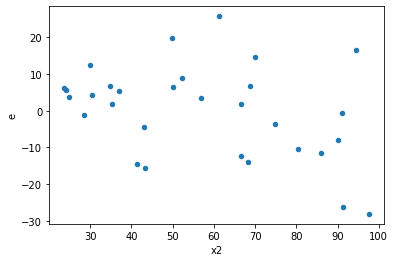

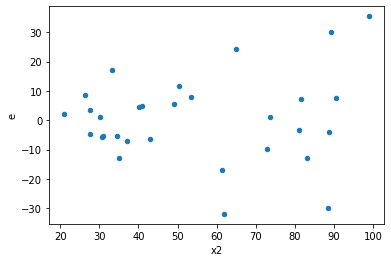

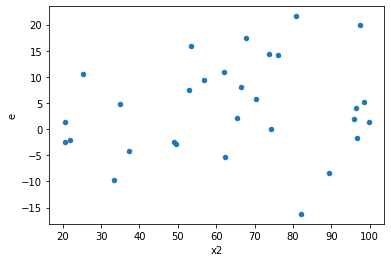

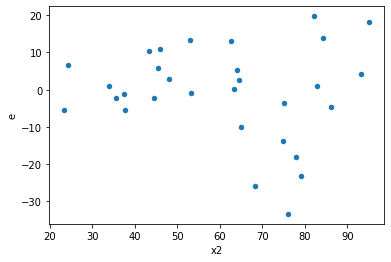

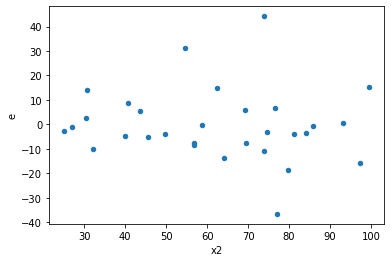

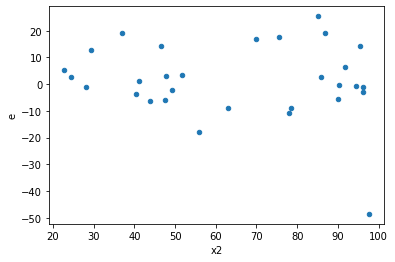

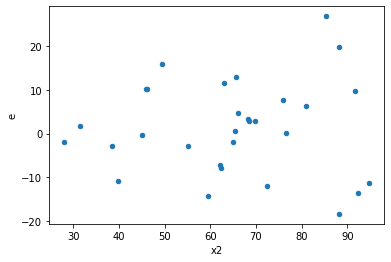

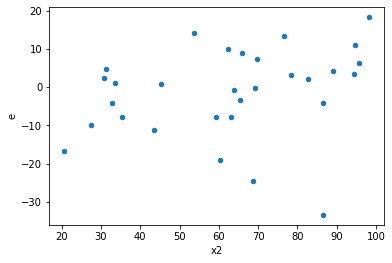

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,18.0,8.0,1331.3923759023573,1675.6274424207108,73.96624310568652,209.45343030258886,2.8317435293193376,0.13619736430204066,0.9319013178489797,0.06809868215102033,Reject005=1 : Homoscedasticity
2.0,12.0,14.0,965.6396013967639,2220.6303026840665,80.46996678306365,158.61645019171903,1.971126080110458,0.22626551569136755,0.8868672421543162,0.11313275784568377,Reject005=1 : Homoscedasticity
5.0,9.0,17.0,429.34884360718115,3811.1584766941523,47.70542706746457,224.18579274671484,4.69937712599603,0.006016386581745969,0.996991806709127,0.0030081932908729847,Reject005=0 : Heteroscedasticity
6.0,11.0,15.0,2561.14017632012,3518.9261270924208,232.83092512001093,234.59507513949472,1.0075769574792286,0.9662739355322365,0.5168630322338817,0.48313696776611825,Reject005=1 : Homoscedasticity
7.0,15.0,11.0,1440.09352310059,3874.8960976959397,96.00623487337266,352.2632816087218,3.669170883259188,0.035095560607590004,0.982452219696205,0.017547780303795002,Reject005=0 : Heteroscedasticity
8.0,12.0,14.0,1027.6908192695153,1733.2147260342017,85.64090160579293,123.80105185958584,1.4455832381289604,0.5057922298112467,0.7471038850943766,0.25289611490562336,Reject005=1 : Homoscedasticity
12.0,16.0,10.0,1700.9349805300253,1631.5138008477418,106.30843628312658,163.1513800847742,1.5346983342908016,0.49768636372072783,0.7511568181396361,0.24884318186036392,Reject005=1 : Homoscedasticity
13.0,14.0,12.0,1094.0496956407642,2644.280827192485,78.14640683148316,220.35673559937376,2.819793571245783,0.07946994949882424,0.9602650252505879,0.03973497474941212,Reject005=1 : Homoscedasticity
14.0,6.0,20.0,707.9268494979963,2396.922203079663,117.98780824966605,119.84611015398316,1.0157499485064159,0.8864082336602839,0.5567958831698581,0.44320411683014194,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,18.0,8.0,1331.3923759023573,1675.6274424207108,73.96624310568652,209.45343030258886,2.8317435293193376,0.13619736430204066,Reject005=1 : Homoscedasticity
1.0,13.0,13.0,1611.5864390603524,751.1565847511753,123.96818762002711,57.78127575009041,0.46609760826055524,0.18206514587771183,Reject005=1 : Homoscedasticity
2.0,12.0,14.0,965.6396013967639,2220.6303026840665,80.46996678306365,158.61645019171903,1.971126080110458,0.22626551569136755,Reject005=1 : Homoscedasticity
3.0,14.0,12.0,4182.748624473927,1118.3975493888533,298.76775889099474,93.19979578240445,0.3119473002319783,0.04099392410615726,Reject005=0 : Heteroscedasticity
4.0,17.0,9.0,1776.8457276575357,124.38308453129818,104.52033692103151,13.820342725699797,0.13222635070667169,0.0003950168678550509,Reject005=0 : Heteroscedasticity
5.0,9.0,17.0,429.34884360718115,3811.1584766941523,47.70542706746457,224.18579274671484,4.69937712599603,0.006016386581745969,Reject005=0 : Heteroscedasticity
6.0,11.0,15.0,2561.14017632012,3518.9261270924208,232.83092512001093,234.59507513949472,1.0075769574792286,0.9662739355322365,Reject005=1 : Homoscedasticity
7.0,15.0,11.0,1440.09352310059,3874.8960976959397,96.00623487337266,352.2632816087218,3.669170883259188,0.035095560607590004,Reject005=0 : Heteroscedasticity
8.0,12.0,14.0,1027.6908192695153,1733.2147260342017,85.64090160579293,123.80105185958584,1.4455832381289604,0.5057922298112467,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      810
Reject005=0 : Heteroscedasticity    190
Name: Result_test, dtype: int64